In [4]:
import pandas
import matplotlib.pyplot as plt
import numpy
from matplotlib.lines import Line2D
import json

from collections import defaultdict

In [5]:
df = pandas.read_csv('a11y-aggregate-scan.csv')
print(df)

                                                       ID  \
0       abef44ae06db4204313800369b7f974349978351cd9c77...   
1       010c9497f00c20c62f278456327bb9e3933c4fcef5c6b7...   
2       8662195164e1ba0cf34dc5fa7a22306c883229e99f6efa...   
3       db617cb33c8a99dc4528f2ad1d9639f629976b834b24e2...   
4       3c70174e0a705ab004f765a7f132db59e87855156bc93b...   
...                                                   ...   
571480  cbf700a9e7adb07c63509336565d97baa3ab131f1d5877...   
571481  0d5fb307d2bddb9138631a277a73069283daab8597c8d6...   
571482  fb50be8bcc0aec1cf0267f2289f82bb22b064e4827052a...   
571483  8d26756916c30f603b86316d838e4090efb81fc28096d8...   
571484  d79a0eed8ba6c86b750869e10c5bfb239717ac2f3c8313...   

                                              Notebook      Theme Standard  \
0       f22a8028b9fd08cce576531c004f250b08852c58.ipynb       dark  WCAG2AA   
1       0b06f98da97edb472f2fc1995dab235c4063a89e.ipynb       dark  WCAG2AA   
2       02ad60c3d2e7a492f98d1f457

In [7]:
def cdf(data, sort_needed=True):
    n = len(data)
    x = data
    if sort_needed:
        x = numpy.sort(data) # sort your data
    y = numpy.arange(1, n + 1) / n # calculate cumulative probability
    return x, y

[error] [dark] [P=25] 52.0
[error] [dark] [P=50] 129.0
[error] [dark] [P=75] 281.0
[error] [dark] [P=90] 503.0
[error] [dark] [P=95] 696.0999999999913
[error] [dark] [P=99] 1226.0
[error] [light] [P=25] 87.0
[error] [light] [P=50] 206.0
[error] [light] [P=75] 438.0
[error] [light] [P=90] 781.0
[error] [light] [P=95] 1089.0
[error] [light] [P=99] 1929.0
[error] [material-darker] [P=25] 33.0
[error] [material-darker] [P=50] 70.0
[error] [material-darker] [P=75] 140.0
[error] [material-darker] [P=90] 248.0
[error] [material-darker] [P=95] 341.0
[error] [material-darker] [P=99] 623.0899999999965
[error] [horizon] [P=25] 11.0
[error] [horizon] [P=50] 31.0
[error] [horizon] [P=75] 77.0
[error] [horizon] [P=90] 162.0
[error] [horizon] [P=95] 239.0
[error] [horizon] [P=99] 510.31999999999243
[error] [darcula] [P=25] 88.0
[error] [darcula] [P=50] 205.0
[error] [darcula] [P=75] 427.0
[error] [darcula] [P=90] 768.0
[error] [darcula] [P=95] 1067.550000000003
[error] [darcula] [P=99] 1928.910000000

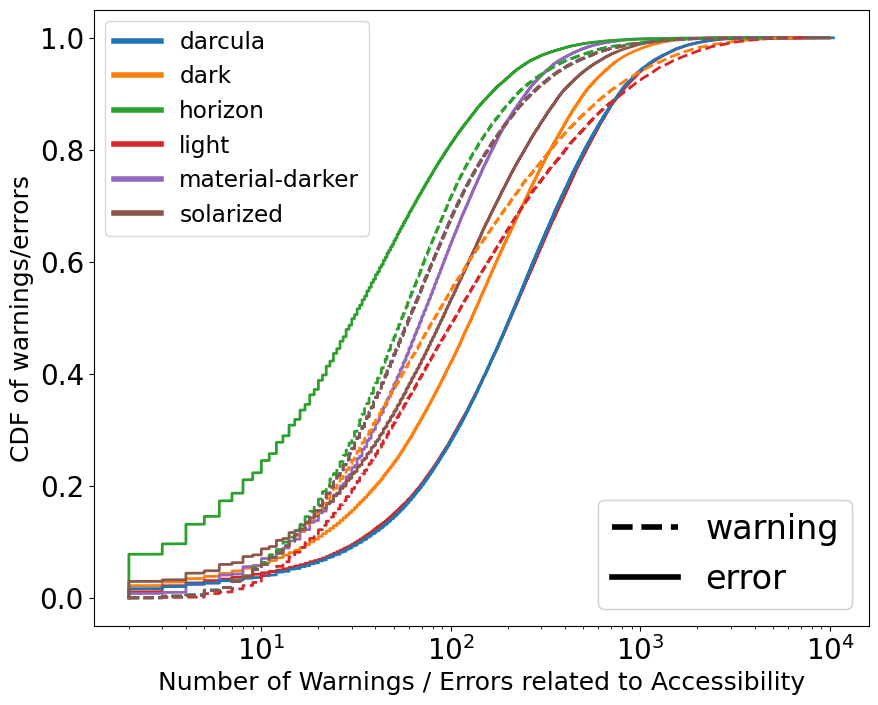

In [19]:
def plot_aggregate_errors_and_warnings(df):
    error_results = defaultdict(list)
    warning_results = defaultdict(list)
    for index, row in df.iterrows():
        theme = row['Theme']
        error_count = row['Errors']
        warning_count = row['Warnings']
        error_results[theme].append(error_count)
        warning_results[theme].append(warning_count)

    plot_line_style = {
        'warning': '--',
        'error': '-',
    }
    theme_style = {
        'darcula': '#1f77b4',
        'dark': '#ff7f0e',
        'horizon': '#2ca02c',
        'light': '#d62728',
        'material-darker': '#9467bd',
        'solarized': '#8c564b',
    }
    import matplotlib
    matplotlib.rcParams.update({'font.size': 20})
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
    for plot_type, result_dict in [('error', error_results), ('warning', warning_results)]:
        for theme, arr in result_dict.items():
            theme_color = theme_style[theme]
            line_style = plot_line_style[plot_type]
            X, Y = cdf(arr, sort_needed=True)
            for p in [25, 50, 75, 90, 95, 99]:
                print(f'[{plot_type}] [{theme}] [P={p}] {numpy.percentile(X, p)}')
            ax.plot(X, Y, label=f'{theme}', linestyle=line_style, linewidth=2, color=theme_color)
    ax.set_xlabel('Number of Warnings / Errors related to Accessibility', fontsize=18)
    ax.set_ylabel('CDF of warnings/errors', fontsize=18)
    ax.set_xscale('log')
    line_labels = [k for k, c in theme_style.items()]
    custom_lines = [Line2D([0], [0], color=c, linewidth=4) for k, c in theme_style.items()]
    agg_label_lines = [Line2D([1], [1], linestyle=l, color='black', linewidth=4) for k, l in plot_line_style.items()]
    agg_labels = [k for k, c in plot_line_style.items()]
    l1 = ax.legend(custom_lines, line_labels, loc=2, fancybox=True, fontsize='small')
    l2 = ax.legend(agg_label_lines, agg_labels, loc=4, fontsize='large')

    ax.add_artist(l1)
    ax.add_artist(l2)
    plt.savefig('submission-figures/warnings_errors.pdf', bbox_inches='tight')
    

plot_aggregate_errors_and_warnings(df)

In [21]:
error_results = defaultdict(list)
warning_results = defaultdict(list)
for index, row in df.iterrows():
    theme = row['Theme']
    error_count = row['Errors']
    warning_count = row['Warnings']
    error_results[theme].append(error_count)
    warning_results[theme].append(warning_count)

In [22]:
horizon_errors = error_results['horizon']
light_errors = error_results['light']

In [31]:
from scipy.stats import ttest_ind, normaltest, ttest_rel

print(normaltest(horizon_errors))
print(normaltest(light_errors))

print(numpy.mean(horizon_errors), numpy.std(horizon_errors))
print(numpy.mean(light_errors), numpy.std(light_errors))

print(len(light_errors))
print(len(horizon_errors))

r = ttest_rel(light_errors, horizon_errors[:len(light_errors)])
print(r)

r = ttest_ind(light_errors, horizon_errors)
print(r)

NormaltestResult(statistic=204287.75966766058, pvalue=0.0)
NormaltestResult(statistic=60994.34539111366, pvalue=0.0)
67.52855900868344 138.97729230710743
335.40378751235517 393.72688809950836
95102
95469
TtestResult(statistic=198.01571094812007, pvalue=0.0, df=95101)
Ttest_indResult(statistic=198.18722849841564, pvalue=0.0)
